In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/mansipandya/Desktop/KnidianMD/data/test_cases.csv')

In [4]:
y_truth = df['symptoms'].apply(lambda x: x.split(', ')).tolist()[0]

In [5]:
y_truth

['(1276 joint swelling)',
 '(2438 fever)',
 '(50 malaise)',
 '(1469 Intravenous drug user)',
 '(4226 knee arthritis)',
 '(450 limited motion of range) ',
 '(1320 Synovial fluid cell count high over 2000 ul)']

In [6]:
import re

# Regular expression pattern to extract the number and description
pattern = r'\((\d+) (\w+(\s\w+)*)\)'

# Initialize an empty dictionary
result_dict = {}

# Iterate over the list of strings
for item in y_truth:
    # Extract number and description using regular expression
    match = re.match(pattern, item)
    if match:
        number = int(match.group(1))
        description = match.group(2)
        # Add to dictionary
        result_dict[number] = description

print(result_dict)

{1276: 'joint swelling', 2438: 'fever', 50: 'malaise', 1469: 'Intravenous drug user', 4226: 'knee arthritis', 450: 'limited motion of range', 1320: 'Synovial fluid cell count high over 2000 ul'}


In [8]:
keys_to_slice = list(result_dict.keys())[:5]

In [9]:
keys_to_slice

[1276, 2438, 50, 1469, 4226]

In [12]:
sliced_dict = {key: result_dict[key] for key in keys_to_slice}

In [13]:
sliced_dict

{1276: 'joint swelling',
 2438: 'fever',
 50: 'malaise',
 1469: 'Intravenous drug user',
 4226: 'knee arthritis'}

In [14]:
keys_set = set(sliced_dict.keys())

In [15]:
keys_set

{50, 1276, 1469, 2438, 4226}

In [16]:
lc_dict = {'1109': 'Pain;musculoskeletal;knee', '4658': 'Tenderness on palpation of suprapatellar region of both knees with swelling', '4657': 'Superior unilateral or bilateral knee joint pain', '2745': 'Personal history of drug therapy', '1469': 'Drug UserIntravenous', '265': 'History of - alcoholism (context-dependent category)', '1301': 'Drug addiction', '306': 'sexual; arousal decreased', '262': 'sexual impotence', '4431': 'Tenderness of knee joint.', '4432': 'Knee stiffness', '3720': 'Skin of the knee', '4226': 'arthritis knee', '3022': 'Pain or tenderness on palpation of bicipital groove', '3807': 'Tarsus', '4599': 'soft tissue pain in lateral surface of left elbow', '4590': 'Structure of bursa of olecranon', '3912': 'Underdeveloped outer large forearm bone', '2824': 'neutrophilic leukocytosis', '3713': 'Increased leukocyte count in CSF', '437': 'Decreased blood leukocyte number', '2204': 'Bronchoalveolar lavage with neutophils', '1174': 'Urinalysis with microscope  with >5 leucocytes', 'id': 'symptom', '394': 'String test', '3234': 'Prodromal Symptoms', '4680': 'Memory Deficits.', '1029': 'Losing words'}

In [18]:
keys_set1 = set(result_dict.keys())
keys_set2 = set(lc_dict.keys())

overlap = len(keys_set1.intersection(keys_set2))

print(overlap)

0


# Taking in multiple medical history texts

In [10]:
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.discard('no')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mansipandya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
text = "A 24-year-old woman presents with acute swelling in her right knee, pain that hinders her ability to bear weight on her right leg, and a one-week history of intermittent low-grade fevers and malaise. She has a history of daily heroin use but is otherwise healthy. She reports no recent sexual activity. On examination, her right knee is erythematous and hot, with an obvious joint effusion. She has limited and minimal range of motion of the knee. She has track marks over both antecubital fossae. Joint aspiration shows a leukocyte count of 132,000 cells per mm3 with 95% neutrophils."


In [8]:
def preprocess_medical_history(text,stop_words):
    original_text = text
    original = text.lower() 
    pattern = r'\b\d+(\.\d+)?\s*\w+/\w+\b'
    original = re.sub(pattern, '.', original)
    original = original.replace('-', ' ')
    original = ''.join(char for char in original if char.isalpha() or char.isspace() or char == '.')
    words = original.split()
    filtered_words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(filtered_words)
    sentences = cleaned_text.split('.')
    cleaned_sentences = [sentence.strip() for sentence in sentences]
    return cleaned_sentences,original_text

In [99]:
cleaned_sentences,original_text = preprocess_medical_history(text,stop_words)

In [100]:
cleaned_sentences

['year old woman presents acute swelling right knee pain hinders ability bear weight right leg one week history intermittent low grade fevers malaise',
 'history daily heroin use otherwise healthy',
 'reports no recent sexual activity',
 'examination right knee erythematous hot obvious joint effusion',
 'limited minimal range motion knee',
 'track marks antecubital fossae',
 'joint aspiration shows leukocyte count cells per mm neutrophils',
 '']

In [3]:
df = pd.read_csv('/Users/mansipandya/Desktop/KnidianMD/data/test_cases.csv')

In [12]:
df['Processed_Medical_History'] = df['medical_history'].apply(preprocess_medical_history, stop_words=stop_words)

In [14]:
df

,medical_history,symptoms,Processed_Medical_History
0,A 24-year-old woman presents with acute swelli...,"(1276 joint swelling), (2438 fever), (50 malai...",([year old woman presents acute swelling right...
1,A 12-year-old girl presents with sudden-onset ...,"(4334 Generalized abdominal pain), (1047 Nause...",([year old girl presents sudden onset severe g...


In [110]:
df.iloc[1].Processed_Medical_History[0]

['year old girl presents sudden onset severe generalized abdominal pain associated nausea vomiting diarrhea',
 'exam appears ill temperature f c',
 'abdomen tense generalized tenderness guarding',
 'no bowel sounds present',
 '']

# Evaluation

In [56]:
loaded_df = pd.read_pickle('/Users/mansipandya/Desktop/KnidianMD/df_pickle.pkl')

In [57]:
loaded_df

,medical_history,symptoms,Processed_Medical_History,traditional,traditional_ss,langchain
0,A 24-year-old woman presents with acute swelli...,"{1276: 'joint swelling', 2438: 'fever', 50: 'm...",([year old woman presents acute swelling right...,{661: 'history of chronic recurrent pain; righ...,"{450: 'limited motion of range', 1562: 'swelli...","{'1109': 'Pain;musculoskeletal;knee', '4658': ..."
1,A 12-year-old girl presents with sudden-onset ...,"{4334: 'Generalized abdominal pain', 1047: 'Na...",([year old girl presents sudden onset severe g...,"{3953: 'cold arm of sudden onset?', 4334: 'gen...","{3772: 'no bowel sounds', 822: 'decreased bowe...","{'4334': 'Generalized abdominal pain', '412': ..."


In [58]:
def calculate_precision(y_truth, y_pred):
    set_truth = set(y_truth.keys())
    set_pred = set(y_pred.keys())
    true_positives = len(set_truth.intersection(set_pred))
    false_positives = len(set_pred.difference(set_truth))
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0.0
    return precision

def calculate_recall(y_truth, y_pred):
    set_truth = set(y_truth.keys())
    set_pred = set(y_pred.keys())
    true_positives = len(set_truth.intersection(set_pred))
    false_negatives = len(set_truth.difference(set_pred))
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0.0
    return recall

def calculate_f1_score(precision,recall):
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1_score

In [59]:
def evaluate(y_truth, y_pred):
    k_values = list(range(1, len(y_pred)+1))
    precision_values, recall_values, f1_score_values = [], [], []
    for k in k_values:
        sliced_y_pred = {key: y_pred[key] for key in list(y_pred.keys())[:k]}
        precision = calculate_precision(y_truth, sliced_y_pred)
        precision_values.append(precision)
        recall = calculate_recall(y_truth, sliced_y_pred)
        recall_values.append(recall)
        f1_score = calculate_f1_score(precision, recall)
        f1_score_values.append(f1_score)
    return precision_values, recall_values, f1_score_values


In [60]:
loaded_df['precision_trad'], loaded_df['recall_trad'], loaded_df['f1_trad'] = zip(*loaded_df.apply(lambda row: evaluate(row['symptoms'], row['traditional']), axis=1))
loaded_df['precision_trad_ss'], loaded_df['recall_trad_ss'], loaded_df['f1_trad_ss'] = zip(*loaded_df.apply(lambda row: evaluate(row['symptoms'], row['traditional_ss']), axis=1))
loaded_df['precision_lang'], loaded_df['recall_lang'], loaded_df['f1_lang'] = zip(*loaded_df.apply(lambda row: evaluate(row['symptoms'], row['langchain']), axis=1))

In [70]:
loaded_df

,medical_history,symptoms,Processed_Medical_History,traditional,traditional_ss,langchain,precision_trad,recall_trad,f1_trad,precision_trad_ss,recall_trad_ss,f1_trad_ss,precision_lang,recall_lang,f1_lang
0,A 24-year-old woman presents with acute swelli...,"{1276: 'joint swelling', 2438: 'fever', 50: 'm...",([year old woman presents acute swelling right...,{661: 'history of chronic recurrent pain; righ...,"{450: 'limited motion of range', 1562: 'swelli...","{'1109': 'Pain;musculoskeletal;knee', '4658': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1111111111111...","[1.0, 0.5, 0.6666666666666666, 0.5, 0.6, 0.5, ...","[0.14285714285714285, 0.14285714285714285, 0.2...","[0.25, 0.22222222222222224, 0.4, 0.36363636363...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,A 12-year-old girl presents with sudden-onset ...,"{4334: 'Generalized abdominal pain', 1047: 'Na...",([year old girl presents sudden onset severe g...,"{3953: 'cold arm of sudden onset?', 4334: 'gen...","{3772: 'no bowel sounds', 822: 'decreased bowe...","{'4334': 'Generalized abdominal pain', '412': ...","[0.0, 0.5, 0.6666666666666666, 0.75, 0.8, 0.83...","[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75]","[0, 0.2, 0.36363636363636365, 0.5, 0.615384615...","[1.0, 0.5, 0.3333333333333333, 0.25, 0.4, 0.33...","[0.125, 0.125, 0.125, 0.125, 0.25, 0.25, 0.25,...","[0.2222222222222222, 0.2, 0.18181818181818182,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [85]:
max_length = loaded_df['precision_trad'].apply(len).max()
padded_lists = loaded_df['precision_trad'].apply(lambda x: x + [0] * (max_length - len(x)))
average_list = np.mean(padded_lists.tolist(), axis=0)
print(average_list)

[0.         0.25       0.33333333 0.375      0.4        0.41666667
 0.42857143 0.         0.         0.         0.04545455]
11


In [86]:
df_prf = pd.read_pickle('/Users/mansipandya/Desktop/KnidianMD/df_prf_pickle.pkl')

In [87]:
df_prf

,medical_history,symptoms,Processed_Medical_History,traditional,traditional_ss,langchain,precision_trad,recall_trad,f1_trad,precision_trad_ss,recall_trad_ss,f1_trad_ss,precision_lang,recall_lang,f1_lang
0,A 24-year-old woman presents with acute swelli...,"{1276: 'joint swelling', 2438: 'fever', 50: 'm...",([year old woman presents acute swelling right...,{661: 'history of chronic recurrent pain; righ...,"{450: 'limited motion of range', 1562: 'swelli...","{'1109': 'Pain;musculoskeletal;knee', '4658': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1111111111111...","[1.0, 0.5, 0.6666666666666666, 0.5, 0.6, 0.5, ...","[0.14285714285714285, 0.14285714285714285, 0.2...","[0.25, 0.22222222222222224, 0.4, 0.36363636363...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,A 12-year-old girl presents with sudden-onset ...,"{4334: 'Generalized abdominal pain', 1047: 'Na...",([year old girl presents sudden onset severe g...,"{3953: 'cold arm of sudden onset?', 4334: 'gen...","{3772: 'no bowel sounds', 822: 'decreased bowe...","{'4334': 'Generalized abdominal pain', '412': ...","[0.0, 0.5, 0.6666666666666666, 0.75, 0.8, 0.83...","[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75]","[0, 0.2, 0.36363636363636365, 0.5, 0.615384615...","[1.0, 0.5, 0.3333333333333333, 0.25, 0.4, 0.33...","[0.125, 0.125, 0.125, 0.125, 0.25, 0.25, 0.25,...","[0.2222222222222222, 0.2, 0.18181818181818182,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [100]:
import matplotlib.pyplot as plt

def plot_prf(df, precision, recall, f1, plot_name):

    max_length = df[precision].apply(len).max()
    padded_lists = df[precision].apply(lambda x: x + [0] * (max_length - len(x)))
    average_precision_list = np.mean(padded_lists.tolist(), axis=0)

    max_length = df[recall].apply(len).max()
    padded_lists = df[recall].apply(lambda x: x + [0] * (max_length - len(x)))
    average_recall_list = np.mean(padded_lists.tolist(), axis=0)

    max_length = df[f1].apply(len).max()
    padded_lists = df[f1].apply(lambda x: x + [0] * (max_length - len(x)))
    average_f1_list = np.mean(padded_lists.tolist(), axis=0)

    plt.figure()

    k_values = list(range(1, len(average_list) + 1))
    
    # Plotting precision, recall, and F1-score
    plt.plot(k_values, average_precision_list, label='Precision', marker='o')
    plt.plot(k_values, average_recall_list, label='Recall', marker='o')
    plt.plot(k_values, average_f1_list, label='F1-score', marker='o')

    # Adding labels and title
    plt.xlabel('k values')
    plt.ylabel('Score')
    plt.title('Precision, Recall, and F1-score vs. k')
    plt.xticks(range(1, len(k_values) + 1),rotation = 90)
    plt.legend()

    # file_path = f"/Users/mansipandya/Desktop/KnidianMD/reports/prf_graphs/{plot_name}_prf.png"
    # plt.savefig(file_path)

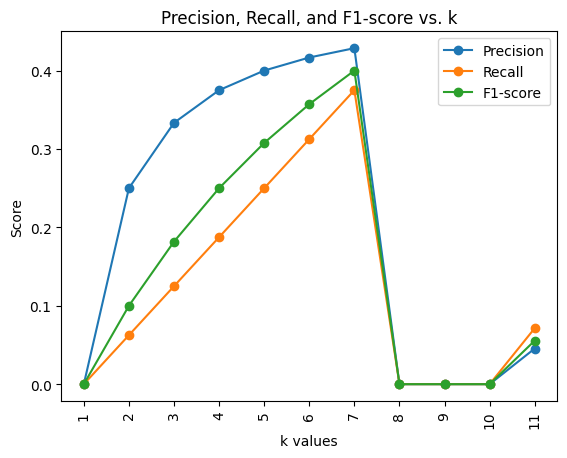

In [101]:
plot_prf(df_prf,'precision_trad','recall_trad','f1_trad', plot_name = "traditional")

In [129]:
def compare_metrics(df,model_type,metric_type):
    columns = [col for col in df.columns if col.startswith(metric_type)]
    print(columns)
    max_val = 0
    for i,column in enumerate(columns):
        max_length = df[column].apply(len).max()
        max_val = max(max_val,max_length)
        padded_lists = df[column].apply(lambda x: x + [0] * (max_length - len(x)))
        average_list = np.mean(padded_lists.tolist(), axis=0)
        plt.plot(list(range(1, len(average_list) + 1)), average_list,label=f'{metric_type} {model_type[i]}', marker='o')
    
    plt.xlabel('k values')
    plt.ylabel('Score')
    plt.title('Precision, Recall, and F1-score vs. k')
    plt.xticks(list(range(1, max_val + 1)),rotation = 90)
    plt.legend()


    # plt.figure()
    # file_path = f"reports/{metric_type}/compare_{metric_type}.png"
    # plt.savefig(file_path)

In [130]:
model_type = ['trad','trad + ss','langchain']

['precision_trad', 'precision_trad_ss', 'precision_lang']


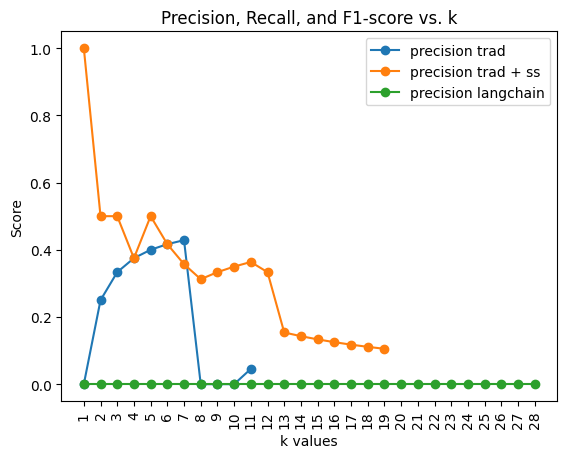

In [131]:
compare_metrics(df_prf,model_type,metric_type='precision')

['recall_trad', 'recall_trad_ss', 'recall_lang']


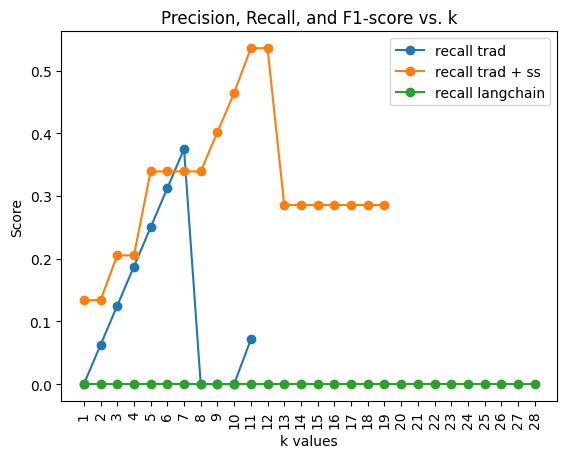

In [132]:
compare_metrics(df_prf,model_type,metric_type='recall')

['f1_trad', 'f1_trad_ss', 'f1_lang']


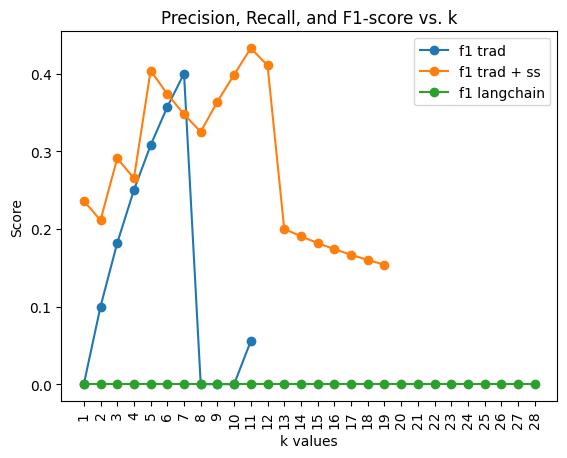

In [133]:
compare_metrics(df_prf,model_type,metric_type='f1')

## Testing with the new Test Cases

In [2]:
import pandas as pd

In [3]:
df_pmh = pd.read_pickle('/Users/mansipandya/Desktop/KnidianMD/checkpoints/df_pmh.pkl')

In [4]:
df_pmh

,medical_history,symptoms,Processed_Medical_History
0,A 24-year-old woman presents with acute swelli...,"{1276: 'joint swelling', 2438: 'fever', 50: 'm...",([year old woman presents acute swelling right...
1,A 12-year-old girl presents with sudden-onset ...,"{4334: 'Generalized abdominal pain', 1047: 'Na...",([year old girl presents sudden onset severe g...
2,A 78-year-old man with emphysema and a 65-pack...,"{1225: 'Personal history of emphysema', 110: '...",([year old man emphysema pack year history smo...
3,A previously healthy 15-year-old girl presents...,"{3242: 'Acute Onset', 4: 'Chest pain', 1120: '...",([previously healthy year old girl presents em...
4,A 19-year-old woman reports irregular menses. ...,"{352: 'Irregular Menses', 166: 'Oligomenorrhea...","([year old woman reports irregular menses, rea..."
5,A 24-year-old woman presents with acute swelli...,"{450: 'Range of joint movement reduced', 4216:...",([year old woman presents acute swelling right...
6,A 59-year-old man with a history of hypertensi...,"{3276: 'Chronic Onset', 9: 'Personal history o...",([year old man history hypertension type diabe...
7,"A 68-year-old woman with heart failure, chroni...","{104: 'Personal history heart failure', 9: 'Pe...",([year old woman heart failure chronic kidney ...


In [5]:
df_model = pd.read_pickle('/Users/mansipandya/Desktop/KnidianMD/checkpoints/df_model.pkl')

In [6]:
df_model

,medical_history,symptoms,Processed_Medical_History,traditional,traditional_ss,langchain,langchainv2
0,A 24-year-old woman presents with acute swelli...,"{1276: 'joint swelling', 2438: 'fever', 50: 'm...",([year old woman presents acute swelling right...,{661: 'history of chronic recurrent pain; righ...,"{450: 'limited motion of range', 1562: 'swelli...","{1109: 'Arthralgia (knee)', 4658: 'Tenderness ...","{263: 'swelling of abdomen', 4347: 'swells', 1..."
1,A 12-year-old girl presents with sudden-onset ...,"{4334: 'Generalized abdominal pain', 1047: 'Na...",([year old girl presents sudden onset severe g...,"{3953: 'cold arm of sudden onset?', 4334: 'gen...","{3772: 'no bowel sounds', 822: 'decreased bowe...","{4334: 'Generalized abdominal pain', 412: 'Acu...","{4334: 'Generalized abdominal pain', 1492: 're..."
2,A 78-year-old man with emphysema and a 65-pack...,"{1225: 'Personal history of emphysema', 110: '...",([year old man emphysema pack year history smo...,"{1225: 'personal history of emphysema', 110: '...","{37: 'creatine kinase level', 130: 'high eryth...","{1225: 'Personal history of emphysema', 3919: ...","{3120: 'Progressive muscular weakness', 2315: ..."
3,A previously healthy 15-year-old girl presents...,"{3242: 'Acute Onset', 4: 'Chest pain', 1120: '...",([previously healthy year old girl presents em...,{3024: 'pain in shoulder radiating to forearm'...,"{4089: 'electrocardiogram', 1167: 'chest x-ray...","{777: 'Left upper quadrant abdominal pain', 48...","{4: 'Chest pain', 3976: 'No Chest pain', 52: '..."
4,A 19-year-old woman reports irregular menses. ...,"{352: 'Irregular Menses', 166: 'Oligomenorrhea...","([year old woman reports irregular menses, rea...","{352: 'menses irregular', 3732: 'galactorrhea'...","{219: 'thyroid enlarged', 1271: 'glands enlarg...","{352: 'irregular period', 166: 'infrequent men...","{352: 'irregular period', 1992: 'Menstrual spo..."
5,A 24-year-old woman presents with acute swelli...,"{450: 'Range of joint movement reduced', 4216:...",([year old woman presents acute swelling right...,{661: 'history of chronic recurrent pain; righ...,"{450: 'limited motion of range', 1562: 'swelli...","{1109: 'Arthralgia (knee)', 4658: 'Tenderness ...","{263: 'swelling of abdomen', 4347: 'swells', 1..."
6,A 59-year-old man with a history of hypertensi...,"{3276: 'Chronic Onset', 9: 'Personal history o...",([year old man history hypertension type diabe...,{3862: 'chronic cough lasting > 3 months per y...,"{209: 'glomerular filtration rate low', 864: '...","{9: 'History of hypertension (situation)', 366...","{4325: 'Idiopathic Headaches', 1901: 'Headache..."
7,"A 68-year-old woman with heart failure, chroni...","{104: 'Personal history heart failure', 9: 'Pe...",([year old woman heart failure chronic kidney ...,"{3466: 'heart failure', 3467: 'kidney failure'...","{18: 'temperature elevation', 1630: 'ph monito...","{599: 'Acute kidney injury', 4086: 'Acute hear...","{104: 'History of congestive heart failure', 3..."


In [9]:
df_model_eval = pd.read_pickle('/Users/mansipandya/Desktop/KnidianMD/checkpoints/df_prf_pickle.pkl')

In [10]:
df_model_eval

,medical_history,symptoms,Processed_Medical_History,traditional,traditional_ss,langchain,langchainv2,precision_trad,recall_trad,f1_trad,precision_trad_ss,recall_trad_ss,f1_trad_ss,precision_lang,recall_lang,f1_lang,precision_langv2,recall_langv2,f1_langv2
0,A 24-year-old woman presents with acute swelli...,"{1276: 'joint swelling', 2438: 'fever', 50: 'm...",([year old woman presents acute swelling right...,{661: 'history of chronic recurrent pain; righ...,"{450: 'limited motion of range', 1562: 'swelli...","{1109: 'Arthralgia (knee)', 4658: 'Tenderness ...","{263: 'swelling of abdomen', 4347: 'swells', 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1111111111111...","[1.0, 0.5, 0.6666666666666666, 0.5, 0.6, 0.5, ...","[0.14285714285714285, 0.14285714285714285, 0.2...","[0.25, 0.22222222222222224, 0.4, 0.36363636363...","[0.0, 0.0, 0.0, 0.0, 0.2, 0.16666666666666666,...","[0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.14...","[0, 0, 0, 0, 0.16666666666666666, 0.1538461538...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1428571428571...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1428571428571...","[0, 0, 0, 0, 0, 0, 0.14285714285714285, 0.1333..."
1,A 12-year-old girl presents with sudden-onset ...,"{4334: 'Generalized abdominal pain', 1047: 'Na...",([year old girl presents sudden onset severe g...,"{3953: 'cold arm of sudden onset?', 4334: 'gen...","{3772: 'no bowel sounds', 822: 'decreased bowe...","{4334: 'Generalized abdominal pain', 412: 'Acu...","{4334: 'Generalized abdominal pain', 1492: 're...","[0.0, 0.5, 0.6666666666666666, 0.75, 0.8, 0.83...","[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75]","[0, 0.2, 0.36363636363636365, 0.5, 0.615384615...","[1.0, 0.5, 0.3333333333333333, 0.25, 0.4, 0.33...","[0.125, 0.125, 0.125, 0.125, 0.25, 0.25, 0.25,...","[0.2222222222222222, 0.2, 0.18181818181818182,...","[1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.33...","[0.125, 0.125, 0.125, 0.125, 0.125, 0.25, 0.25...","[0.2222222222222222, 0.2, 0.18181818181818182,...","[1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.33...","[0.125, 0.125, 0.125, 0.125, 0.125, 0.25, 0.25...","[0.2222222222222222, 0.2, 0.18181818181818182,..."
2,A 78-year-old man with emphysema and a 65-pack...,"{1225: 'Personal history of emphysema', 110: '...",([year old man emphysema pack year history smo...,"{1225: 'personal history of emphysema', 110: '...","{37: 'creatine kinase level', 130: 'high eryth...","{1225: 'Personal history of emphysema', 3919: ...","{3120: 'Progressive muscular weakness', 2315: ...","[1.0, 1.0, 1.0, 0.75, 0.6]","[0.125, 0.25, 0.375, 0.375, 0.375]","[0.2222222222222222, 0.4, 0.5454545454545454, ...","[0.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16...","[0.0, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125...","[0, 0.2, 0.18181818181818182, 0.16666666666666...","[1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16...","[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.1...","[0.2222222222222222, 0.2, 0.18181818181818182,...","[0.0, 0.0, 0.0, 0.25, 0.2, 0.16666666666666666...","[0.0, 0.0, 0.0, 0.125, 0.125, 0.125, 0.125, 0....","[0, 0, 0, 0.16666666666666666, 0.1538461538461..."
3,A previously healthy 15-year-old girl presents...,"{3242: 'Acute Onset', 4: 'Chest pain', 1120: '...",([previously healthy year old girl presents em...,{3024: 'pain in shoulder radiating to forearm'...,"{4089: 'electrocardiogram', 1167: 'chest x-ray...","{777: 'Left upper quadrant abdominal pain', 48...","{4: 'Chest pain', 3976: 'No Chest pain', 52: '...","[0.0, 0.0, 0.0, 0.0, 0.2, 0.16666666666666666,...","[0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.2, 0.3, 0.4, ...","[0, 0, 0, 0, 0.13333333333333333, 0.125, 0.235...","[0.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16...","[0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, ...","[0, 0.16666666666666669, 0.15384615384615383, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, ...","[0, 0, 0, 0, 0, 0.125, 0.11764705882352941, 0....","[1.